In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="China") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
70,B00 - LTC,China,2017-01-01,458944.00
82,B00 - LTC,China,2017-02-01,184693.52
106,B00 - LTC,China,2017-03-01,139126.94
138,B00 - LTC,China,2017-04-01,131615.22
147,B00 - LTC,China,2017-05-01,76813.41


,date,sales
0,2017-01-01,458944.00
1,2017-02-01,184693.52
2,2017-03-01,139126.94
3,2017-04-01,131615.22
4,2017-05-01,76813.41


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

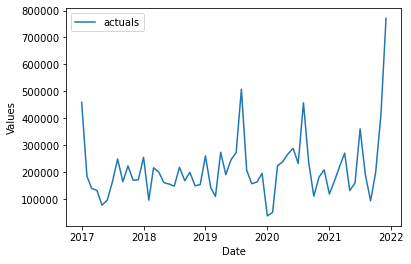

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

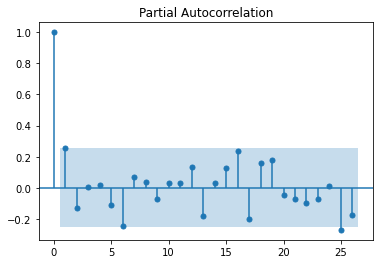

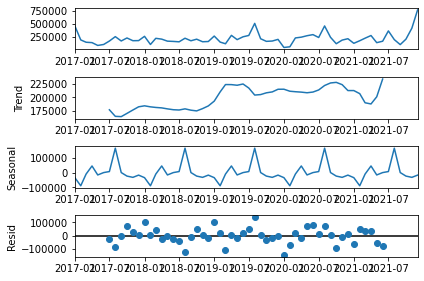

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 37s 37s/step - loss: 0.3703 - val_loss: 0.3525
Epoch 2/200
1/1 [==============================] - 0s 139ms/step - loss: 0.3621 - val_loss: 0.3408
Epoch 3/200
1/1 [==============================] - 0s 138ms/step - loss: 0.3491 - val_loss: 0.3214
Epoch 4/200
1/1 [==============================] - 0s 135ms/step - loss: 0.3276 - val_loss: 0.2823
Epoch 5/200
1/1 [==============================] - 0s 137ms/step - loss: 0.2865 - val_loss: 0.2228
Epoch 6/200
1/1 [==============================] - 0s 199ms/step - loss: 0.2080 - val_loss: 0.2819
Epoch 7/200
1/1 [==============================] - 0s 143ms/step - loss: 0.2226 - val_loss: 0.2556
Epoch 8/200
1/1 [==============================] - 0s 218ms/step - loss: 0.1994 - val_loss: 0.2139
Epoch 9/200
1/1 [==============================] - 0s 169ms/step - loss: 0.1670 - val_loss: 0.2002
Epoch 10/200
1/1 [==============================] - 0s 275ms/step - loss: 0.1795 - val_loss: 0.1946
Epoch 11/2

1/1 [==============================] - 0s 156ms/step - loss: 0.1562 - val_loss: 0.1974
Epoch 84/200
1/1 [==============================] - 0s 136ms/step - loss: 0.1561 - val_loss: 0.1980
Epoch 85/200
1/1 [==============================] - 0s 192ms/step - loss: 0.1563 - val_loss: 0.1977
Epoch 86/200
1/1 [==============================] - 0s 216ms/step - loss: 0.1564 - val_loss: 0.1985
Epoch 87/200
1/1 [==============================] - 0s 133ms/step - loss: 0.1561 - val_loss: 0.1986
Epoch 88/200
1/1 [==============================] - 0s 129ms/step - loss: 0.1561 - val_loss: 0.1971
Epoch 89/200
1/1 [==============================] - 0s 232ms/step - loss: 0.1562 - val_loss: 0.1961
Epoch 90/200
1/1 [==============================] - 0s 149ms/step - loss: 0.1562 - val_loss: 0.1982
Epoch 91/200
1/1 [==============================] - 0s 156ms/step - loss: 0.1562 - val_loss: 0.1993
Epoch 92/200
1/1 [==============================] - 0s 145ms/step - loss: 0.1564 - val_loss: 0.1994
Epoch 93/200


1/1 [==============================] - 0s 163ms/step - loss: 0.1562 - val_loss: 0.1962
Epoch 165/200
1/1 [==============================] - 0s 145ms/step - loss: 0.1561 - val_loss: 0.1966
Epoch 166/200
1/1 [==============================] - 0s 144ms/step - loss: 0.1562 - val_loss: 0.1987
Epoch 167/200
1/1 [==============================] - 0s 139ms/step - loss: 0.1562 - val_loss: 0.1988
Epoch 168/200
1/1 [==============================] - 0s 143ms/step - loss: 0.1561 - val_loss: 0.1980
Epoch 169/200
1/1 [==============================] - 0s 169ms/step - loss: 0.1562 - val_loss: 0.1983
Epoch 170/200
1/1 [==============================] - 0s 156ms/step - loss: 0.1563 - val_loss: 0.1978
Epoch 171/200
1/1 [==============================] - 0s 152ms/step - loss: 0.1563 - val_loss: 0.1984
Epoch 172/200
1/1 [==============================] - 0s 150ms/step - loss: 0.1562 - val_loss: 0.1982
Epoch 173/200
1/1 [==============================] - 0s 173ms/step - loss: 0.1561 - val_loss: 0.1998
Epoc

Epoch 46/200
2/2 [==============================] - 0s 128ms/step - loss: 0.0984 - val_loss: 0.1142
Epoch 47/200
2/2 [==============================] - 0s 131ms/step - loss: 0.0988 - val_loss: 0.1184
Epoch 48/200
2/2 [==============================] - 0s 124ms/step - loss: 0.1002 - val_loss: 0.1206
Epoch 49/200
2/2 [==============================] - 1s 271ms/step - loss: 0.1007 - val_loss: 0.1182
Epoch 50/200
2/2 [==============================] - 0s 132ms/step - loss: 0.1002 - val_loss: 0.1148
Epoch 51/200
2/2 [==============================] - 1s 264ms/step - loss: 0.0995 - val_loss: 0.1132
Epoch 52/200
2/2 [==============================] - 1s 259ms/step - loss: 0.0995 - val_loss: 0.1139
Epoch 53/200
2/2 [==============================] - 0s 134ms/step - loss: 0.0994 - val_loss: 0.1150
Epoch 54/200
2/2 [==============================] - 1s 269ms/step - loss: 0.0994 - val_loss: 0.1140
Epoch 55/200
2/2 [==============================] - 0s 129ms/step - loss: 0.0989 - val_loss: 0.1128


2/2 [==============================] - 0s 135ms/step - loss: 0.1006 - val_loss: 0.1030
Epoch 128/200
2/2 [==============================] - 0s 129ms/step - loss: 0.1002 - val_loss: 0.1036
Epoch 129/200
2/2 [==============================] - 0s 166ms/step - loss: 0.1013 - val_loss: 0.1035
Epoch 130/200
2/2 [==============================] - 0s 146ms/step - loss: 0.1000 - val_loss: 0.1037
Epoch 131/200
2/2 [==============================] - 1s 262ms/step - loss: 0.1005 - val_loss: 0.1051
Epoch 132/200
2/2 [==============================] - 0s 137ms/step - loss: 0.1006 - val_loss: 0.1062
Epoch 133/200
2/2 [==============================] - 0s 115ms/step - loss: 0.0992 - val_loss: 0.1111
Epoch 134/200
2/2 [==============================] - 0s 225ms/step - loss: 0.0983 - val_loss: 0.1165
Epoch 135/200
2/2 [==============================] - 0s 123ms/step - loss: 0.1003 - val_loss: 0.1174
Epoch 136/200
2/2 [==============================] - 0s 151ms/step - loss: 0.0999 - val_loss: 0.1140
Epoc

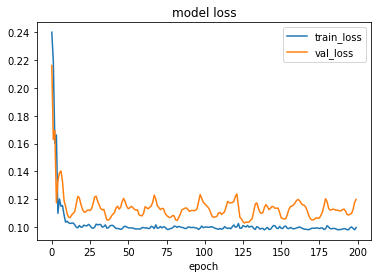

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

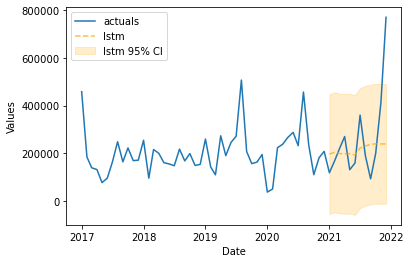

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

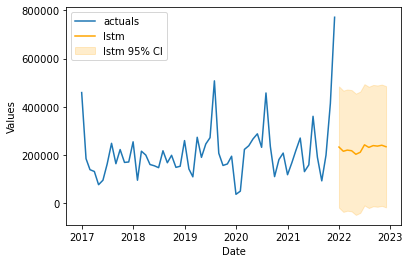

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.45,176883.48,0.03,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,447774.32,196291.17,118233.63,-55191.98,lstm,0.95
1,2021-02-01,455949.40,204466.25,168522.39,-47016.90,lstm,0.95
2,2021-03-01,450438.92,198955.77,218470.44,-52527.37,lstm,0.95
3,2021-04-01,449585.90,198102.75,270267.16,-53380.40,lstm,0.95
4,2021-05-01,449890.65,198407.50,131040.81,-53075.65,lstm,0.95
5,2021-06-01,444086.65,192603.50,159039.44,-58879.65,lstm,0.95
6,2021-07-01,473606.06,222122.91,360473.73,-29360.23,lstm,0.95
7,2021-08-01,482525.76,231042.61,190437.56,-20440.54,lstm,0.95
8,2021-09-01,488375.94,236892.79,92757.76,-14590.35,lstm,0.95
9,2021-10-01,491402.91,239919.76,199381.80,-11563.39,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,484516.33,233033.19,-18449.96,lstm,0.95
1,2022-02-01,466935.89,215452.74,-36030.40,lstm,0.95
2,2022-03-01,471770.33,220287.18,-31195.97,lstm,0.95
3,2022-04-01,469154.28,217671.13,-33812.02,lstm,0.95
4,2022-05-01,454454.59,202971.44,-48511.71,lstm,0.95
5,2022-06-01,462882.00,211398.85,-40084.29,lstm,0.95
6,2022-07-01,493695.98,242212.83,-9270.32,lstm,0.95
7,2022-08-01,483035.47,231552.32,-19930.83,lstm,0.95
8,2022-09-01,490497.05,239013.90,-12469.24,lstm,0.95
9,2022-10-01,488343.47,236860.32,-14622.83,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:3094085.5721259997
Total_2022:2725173.979205903
YOY (growth):-11.923121850395724
